# Common stability analysis

This notebook examines the relationship between commonly DE genes and the stability of those genes

Based on the work in the [previous notebook](1_common_DEGs_and_gene_groups.ipynb), it appears that there is a positive correlation between the being accessory and the gene being found to be commonly DE. Building off of that, we wanted to examine the relationship between how frequently a gene is changed across experiments and the transcriptional stability of the gene (stability is defined [here](../3_core_core_analysis/1_core_core_relationships_across_strains.ipynb)).

Here we hypothesize that if a gene is less stable (i.e. who they are transcriptionally related to changes across strains) then we might see changes across different conditions (i.e. these genes may be more commonly DE). This is the rationale for why accessory genes (which are thought to encode properties that contribute to niche adaptations of strains) are common DE. However this hypothesis doesn't seem to explain the relationship between accessory and common DE.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import utils, paths

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### Get common DE statistics

In [2]:
# Load summary statistics generated by SOPHIE using the PAO1 and PA
pao1_common_DEGs_filename = "find_common_DEGs/generic_gene_summary_SRP117105.tsv"
pa14_common_DEGs_filename = "find_common_DEGs/generic_gene_summary_SRP074292.tsv"


pao1_SOPHIE_stats = pd.read_csv(
    pao1_common_DEGs_filename, sep="\t", index_col=0, header=0
)
pa14_SOPHIE_stats = pd.read_csv(
    pa14_common_DEGs_filename, sep="\t", index_col=0, header=0
)

In [3]:
print(pao1_SOPHIE_stats.shape)
pao1_SOPHIE_stats.head()

(5563, 14)


,Gene ID,Adj P-value (Real),Rank (Real),abs(log2FoldChange) (Real),log2FoldChange (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Percent DE (simulated),Mean abs(log2FoldChange) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score,Gene Name
PA3328,PA3328,4.917896e-25,5563.0,4.298007,4.298007,0.999256,5488.0,98.651564,0.0,0.340896,0.202712,25,19.520883,NaN
PA2303,PA2303,1.487221e-29,5562.0,4.048551,4.048551,0.999672,5445.0,97.878461,0.0,0.266379,0.168746,25,22.413449,ambD
PA4211,PA4211,2.207451e-24,5561.0,3.976647,3.976647,0.682754,5553.0,99.820209,0.0,0.453517,0.274850,25,12.818364,phzB1
PA3332,PA3332,2.012572e-11,5560.0,3.946715,3.946715,0.999256,5500.0,98.867314,0.0,0.294430,0.185347,25,19.705152,NaN
PA1431,PA1431,8.933852e-68,5559.0,3.730831,3.730831,0.999672,4915.0,88.349515,0.0,0.178405,0.165709,25,21.437724,rsaL


### Get stability statistics

In [4]:
# Load transcriptional similarity df
# These are the subset of genes that we will consider
pao1_similarity_scores_filename = (
    "../3_core_core_analysis/pao1_core_similarity_associations_final_spell.tsv"
)
pa14_similarity_scores_filename = (
    "../3_core_core_analysis/pa14_core_similarity_associations_final_spell.tsv"
)

pao1_similarity_scores = pd.read_csv(
    pao1_similarity_scores_filename, sep="\t", header=0, index_col=0
)
pa14_similarity_scores = pd.read_csv(
    pa14_similarity_scores_filename, sep="\t", header=0, index_col=0
)

In [5]:
print(pao1_similarity_scores.shape)
pao1_similarity_scores.head()

(5349, 16)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,75% expression,max expression,variance expression,range expression,pathways present,Related acc genes
PAO1 id,,,,,,,,,,,,,,,,
PA1094,PA14_50270,0.326832,2.285473e-133,fliD,NaN,4867.543068,5825.361224,0.087195,2109.140118,3597.781500,6033.694993,87576.556941,3.393483e+07,87576.469746,['KEGG-Pathway-pae02040: Flagellar assembly'],NaN
PA0935,PA14_52160,0.391218,3.722000e-195,NaN,NaN,271.167829,218.917214,26.136121,162.395953,224.734757,312.468287,4387.771547,4.792475e+04,4361.635426,"['KEGG-Pathway-pae00230: Purine metabolism', '...",NaN
PA4751,PA14_62860,0.509608,0.000000e+00,ftsH,NaN,5598.197708,3969.209125,377.968058,3126.341934,4680.010442,7080.232604,33237.563838,1.575462e+07,32859.595780,[],NaN
PA3895,PA14_13510,0.299470,2.903470e-111,NaN,NaN,165.526283,73.590673,31.816253,121.229894,152.712377,189.405258,759.162220,5.415587e+03,727.345967,[],NaN
PA4769,PA14_63070,0.289410,1.022809e-103,NaN,NaN,288.985482,192.996790,11.634211,189.881467,244.062901,342.301143,2237.704066,3.724776e+04,2226.069854,[],NaN


In [6]:
# Merge transcriptional stability statistics and common statistics
pao1_all_stats = pao1_similarity_scores.merge(
    pao1_SOPHIE_stats,
    left_index=True,
    right_index=True,
)
pa14_all_stats = pa14_similarity_scores.merge(
    pa14_SOPHIE_stats,
    left_index=True,
    right_index=True,
)

In [7]:
print(pao1_all_stats.shape)
pao1_all_stats.head()

(5349, 30)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression,standard deviation expression,min expression,25% expression,50% expression,...,log2FoldChange (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Percent DE (simulated),Mean abs(log2FoldChange) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score,Gene Name
PA1094,PA14_50270,0.326832,2.285473e-133,fliD,NaN,4867.543068,5825.361224,0.087195,2109.140118,3597.781500,...,0.095274,0.999769,2772.0,49.820209,0.0,0.092072,0.126400,25,0.025333,fliD
PA0935,PA14_52160,0.391218,3.722000e-195,NaN,NaN,271.167829,218.917214,26.136121,162.395953,224.734757,...,-0.037833,0.999769,360.0,6.454513,0.0,0.057633,0.055621,25,-0.355995,NaN
PA4751,PA14_62860,0.509608,0.000000e+00,ftsH,NaN,5598.197708,3969.209125,377.968058,3126.341934,4680.010442,...,0.049022,0.999702,914.0,16.414959,0.0,0.090880,0.114057,25,-0.366994,ftsH
PA3895,PA14_13510,0.299470,2.903470e-111,NaN,NaN,165.526283,73.590673,31.816253,121.229894,152.712377,...,0.079544,0.999769,2273.0,40.848616,0.0,0.078623,0.069606,25,0.013231,NaN
PA4769,PA14_63070,0.289410,1.022809e-103,NaN,NaN,288.985482,192.996790,11.634211,189.881467,244.062901,...,-0.054777,0.999769,35.0,0.611291,0.0,0.051911,0.068458,25,0.041860,NaN


Text(0.5, 1.05, 'PAO1 core gene stability vs commonality')

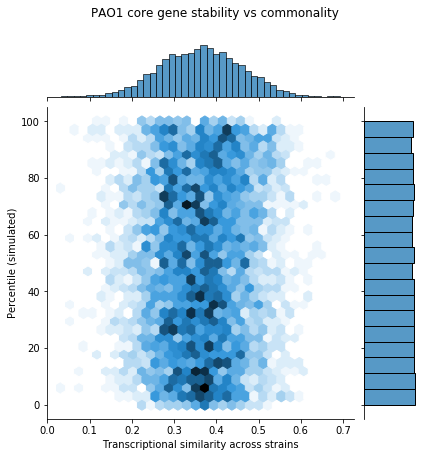

In [8]:
sns.jointplot(
    data=pao1_all_stats,
    x="Transcriptional similarity across strains",
    y="Percentile (simulated)",
    kind="hex",
    # alpha=0.2
)
plt.suptitle("PAO1 core gene stability vs commonality", y=1.05)

Text(0.5, 1.05, 'PAO1 core gene stability vs commonality (z-score)')

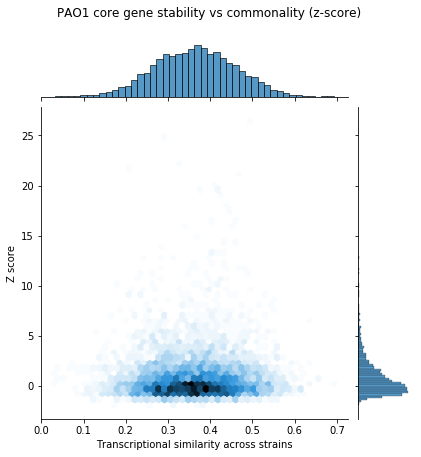

In [9]:
sns.jointplot(
    data=pao1_all_stats,
    x="Transcriptional similarity across strains",
    y="Z score",
    kind="hex",
)
plt.suptitle("PAO1 core gene stability vs commonality (z-score)", y=1.05)

Text(0.5, 1.05, 'PA14 core gene stability vs commonality')

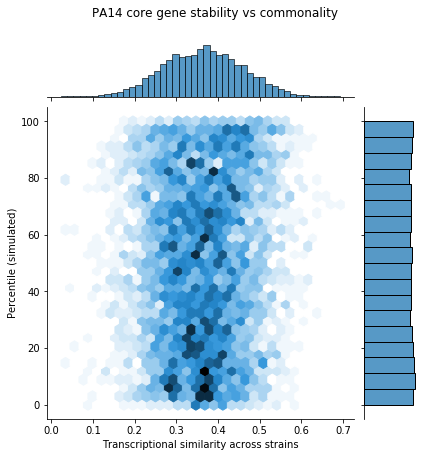

In [10]:
sns.jointplot(
    data=pa14_all_stats,
    x="Transcriptional similarity across strains",
    y="Percentile (simulated)",
    kind="hex",
)
plt.suptitle("PA14 core gene stability vs commonality", y=1.05)

**Takeaway:** There does not look to be any correlation between stability and common DEG. We'll have to think about other followup experiments.